In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Boxplot for the "Median value of owner-occupied homes"

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

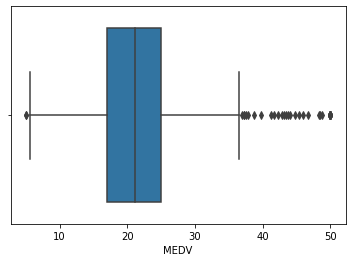

In [4]:
sns.boxplot(boston_df['MEDV'])

bar plot for the Charles river variable

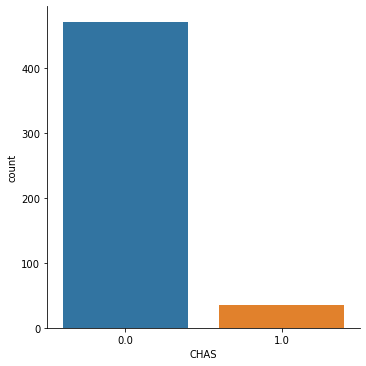

In [5]:
sns.catplot(x='CHAS', kind='count', data=boston_df)

Boxplot for the MEDV variable vs the AGE variable. (Discretizing the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

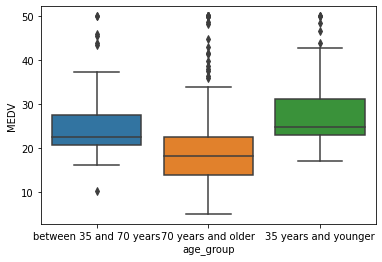

In [7]:
sns.boxplot(x='age_group',y='MEDV',data=boston_df)

<AxesSubplot:xlabel='MEDV', ylabel='age_group'>

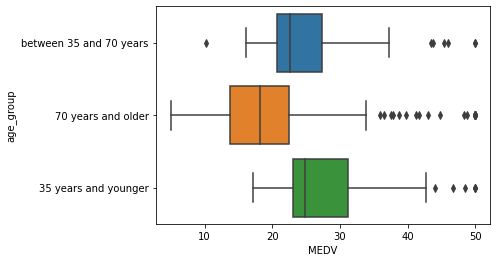

In [8]:
sns.boxplot(x='MEDV',y='age_group',data=boston_df,orient='h')

Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

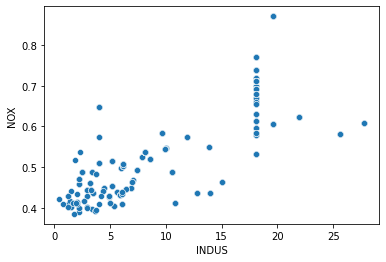

In [9]:
sns.scatterplot(x='INDUS', y='NOX',data=boston_df)

There is a positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town. 

Histogram for the pupil to teacher ratio variable

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PTRATIO'>

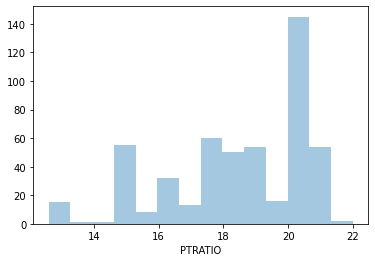

In [10]:
sns.distplot(boston_df['PTRATIO'],kde=False)

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

First we conduct lavene's test with null hypothesis of both samples have equal variances
and alternate hypothesis of both samples have unequal variances

In [11]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

p value < 0.05 hence we reject null hypothesis and variances are not equal

Hypothetis testing using T test with significance value  α = 0.05 

**Null Hypothesis-** There is no significant difference in median value of houses bounded by the Charles river and houses not bound by Charles river.

**Alternate Hypothesis-** There is significant difference in median value of houses bounded by the Charles river and houses not bound by Charles river.

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var =False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since p value is less than 0.05 from t test we reject null hypothesis and there is significant difference in median value of houses bounded by the Charles river and houses not bound by Charles river

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis:**
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

Test for equality of variance

In [13]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05, the variance are equal.

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [14]:
thirtyfive_lower=boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy=boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_upper=boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_upper)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis-**

* **H_0:** Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town.

* **H_1:** Nitric oxide concentrations is correlated with proportion of non-retail business acres per town.

Plotting scatterplot between Nitric oxide concentrations and proportion of non-retail business acres per town

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

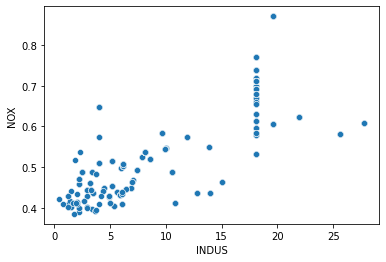

In [16]:
sns.scatterplot(x='INDUS', y='NOX',data=boston_df)

In [17]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a strong positive relationship with correlation coefficient of 0.76 between nitric oxide concentrations and proportion of non-retail business acres per town..

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis-**

* **H_0:** median value of owner occupied homes is not correlated with weighted distance to the five Boston employment centres.

* **H_1:** median value of owner occupied homes is correlated with weighted distance to the five Boston employment centres.

In [18]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.21e-08
Time:                        19:47:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is correlation between median value of owner occupied homes and weighted distance to the five Boston employment centres. The coefficient 1.0916 means median value changes by 1.0916 times in proportion of weighted distance to the five Boston employment centres.